In [2]:
from shapely.geometry import Point, LineString, Polygon

# A.Point

## Create Point geometric objects with coordinates


In [3]:
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 9.57)

## visualize

In [9]:
# lets visualize a point
point1, point2, point3D

(<POINT (2.2 4.2)>, <POINT (7.2 -25.1)>, <POINT Z (9.26 -2.456 9.57)>)

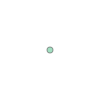

In [10]:
point1

## type()

In [13]:
type(point1), type(point3D), point1.geom_type

(shapely.geometry.point.Point, shapely.geometry.point.Point, 'Point')

## point attributes and functions

### 1.Get the coordinates

In [15]:
point_coords = point1.coords
point_coords

In [16]:
type(point_coords)

shapely.coords.CoordinateSequence

#### a. Get x and y coordinates

In [21]:
xy = point_coords.xy
xy, type(xy)

((array('d', [2.2]), array('d', [4.2])), tuple)

#### b. Get x coordinate only

In [23]:
x = point1.x
x

2.2

#### c. Get y coordinate only

In [24]:
y = point1.y
y

4.2

### 2.Calculate distance betn two points

In [25]:
point_dist = point1.distance(point2)
point_dist # in decimal degrees


29.723559679150142

# B.LineString

## Create LineString-objects

### 1.Using Point objects

In [27]:
line = LineString([point1, point2, point3])


### 2.Using Coordinate *tuples*

In [28]:
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

## visualize line

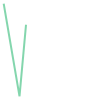

In [29]:
line

## type()

In [31]:
type(line), type(line2), line.geom_type

(shapely.geometry.linestring.LineString,
 shapely.geometry.linestring.LineString,
 'LineString')

## attributes and functions

### 1.Get coordinates

In [33]:
# Get x and y coordinats
lxy = line.xy
lxy, type(lxy)

((array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456])), tuple)

In [38]:
# Get x coordinates only
x = line.xy[0]
x_another_way = lxy[0]
x, x_another_way

(array('d', [2.2, 7.2, 9.26]), array('d', [2.2, 7.2, 9.26]))

In [40]:
# Get y coordinates only
y = line.xy[1]
y_another_way = lxy[1]
y, y_another_way

(array('d', [4.2, -25.1, -2.456]), array('d', [4.2, -25.1, -2.456]))

### 2.Length of the line

In [42]:
l_length = line.length
l_length

52.46106912939557

### 3.Center of the line (centroid)

In [46]:
l_center = line.centroid
l_center, type(l_center) # It is a Point object

(<POINT (6.23 -11.892)>, shapely.geometry.point.Point)

# C.Polygon



## create Polygon-objects

### 1.Using coordinate tuples

In [49]:
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])


### 2.Using point objects

In [55]:
# pass list of lists to Polygon()
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])


In [60]:
poly, poly2 # Note: POLYGON ((<values in here>))

(<POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))>,
 <POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))>)

### 3.Polygon with a hole

In [61]:
# First we define our exterior
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

# Let's create a single big hole where we leave ten decimal degrees at the boundaries of the world
# Notice: there could be multiple holes, thus we need to provide a list of holes
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

In [64]:
# world without a hole
world = Polygon(shell=world_exterior)

# world with a hole
world_has_a_hole = Polygon(shell=world_exterior, holes = hole)

In [65]:
world, world_has_a_hole

(<POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))>,
 <POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80,...>)

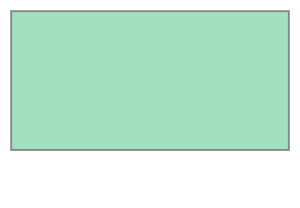

In [66]:
world

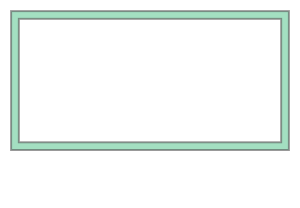

In [67]:
world_has_a_hole

In [68]:
type(world), type(world_has_a_hole)

(shapely.geometry.polygon.Polygon, shapely.geometry.polygon.Polygon)

## visualize polygon

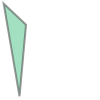

In [56]:
poly

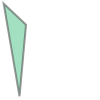

In [57]:
poly2

## type()

In [58]:
type(poly), poly.geom_type

(shapely.geometry.polygon.Polygon, 'Polygon')

## attributes and functions

In [85]:
# center of polygon
world_centroid = world.centroid
print(world_centroid)

POINT (0 0)


In [77]:
# area of polygon
world_area = world.area
world_area

64800.0

In [78]:
# bounds of the Polygon
world_bbox = world.bounds
world_bbox

(-180.0, -90.0, 180.0, 90.0)

In [82]:
# exterior of the polygon
world_ext = world.exterior
print(world_ext)

LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)


In [83]:
# length of the exterior
world_ext_length = world_ext.length
world_ext_length

1080.0

# D.Geometry collections

> MultiPoint
> MultiLineString
> MuiltiPolygon

## create MultiPoint, MultiLineString, MuiltiPolygon

In [86]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box

In [89]:
# create a MultiPoint object
multi_point= MultiPoint([point1, point2, point3])
print(multi_point)

MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


In [91]:
# Create a MultiLineString Object
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line = MultiLineString([line1, line2])
print(multi_line)

MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))


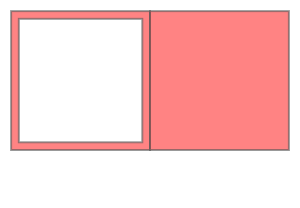

In [93]:
# Create a MultiPolygon object

# Western hemisphere polygon
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]
west_poly = Polygon(shell=west_exterior, holes=west_hole)

#Eastern hemisphere polygon: using bbox to polygon
min_x, min_y = 0, -90
max_x, max_y = 180, 90
east_poly_box = box(minx=min_x, miny = min_y, maxx=max_x, maxy=max_y)

# MultiPolygon
multi_poly = MultiPolygon([west_poly, east_poly_box])
multi_poly


In [94]:
print("MultiPoint:", multi_point)
print("MultiLine: ", multi_line)
print("Bounding box: ", east_poly_box)
print("MultiPoly: ", multi_poly)

MultiPoint: MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
MultiLine:  MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))
Bounding box:  POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))
MultiPoly:  MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


## check shapes

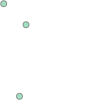

In [97]:
multi_point

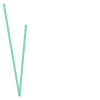

In [98]:
multi_line

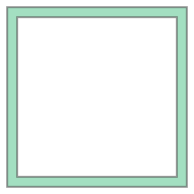

In [99]:
west_poly

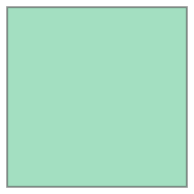

In [101]:
east_poly_box

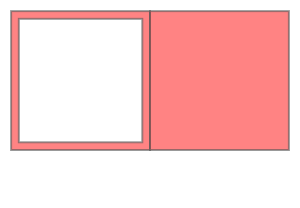

In [100]:
multi_poly

## attributes and functions

Convex hull of the points:  POLYGON ((7.2 -25.1, 2.2 4.2, 9.26 -2.456, 7.2 -25.1))


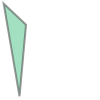

In [104]:
# convex hull of our MultiPoint
convex = multi_point.convex_hull
print("Convex hull of the points: ", convex)
convex

In [119]:
# Line count inside MultiLineString

lines_count = len(multi_line.geoms)
lines_count

2

In [107]:
# area of MultiPolygon
multi_poly_area = multi_poly.area
multi_poly_area

39200.0

In [117]:
west_area = multi_poly.geoms[0].area
west_area

6800.0

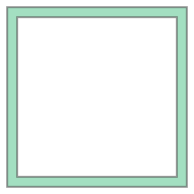

In [118]:
multi_poly.geoms[0]

In [120]:
valid = multi_poly.is_valid
valid

False